
# EDA
<br>


### Import libraries

In [1]:
# nltk
from nltk import FreqDist

# utilities
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# preferences
%matplotlib inline


### Read in dataset, preview first three rows, and display column and datatype info

In [2]:
# read tsv dataset into pandas df
filename = 'amazon_reviews_us_Luggage_v1_00'

cols = ['TARGET',  #<---ratio of helpful votes to total votes above/below median
        'LEM',     #<---lemmas
        'STEM',    #<---stems
        'NOUN',    #<---percentage of nouns
        'ADJ',     #<---percentage of adjectives
        'ADV',     #<---percentage of adverbs
        'VERB',    #<---percentage of verbs
        'CHAR',    #<---number of characters
        'NUM',     #<---number of tokens
        'WORD',    #<---number of words
        'SENT',    #<---number of sentences
        'INTERRO', #<---number of questionss
        'EXCLAM',  #<---number of exclamations
        'COUNT',   #<---number of exclamation points
        'LEN',     #<---average word length
        'AVG',     #<---average sentence length
        'PER',     #<---percentage of questions
        'CAPS',    #<---percentage of capitalized characters
        'STAR',    #<---reviewer's star rating for product
        'MED',     #<---product's median star rating
        'FAV',     #<---reviewer's star rating vs product's median
        'POP',     #<---number of product's reviews
        'DAYS']    #<---days from review date to first review (int)


df = pd.read_csv(f'data/{filename}_processed.csv',
                 usecols = cols)

display(df.head(3))
df.info()

,TARGET,LEM,STEM,NOUN,ADJ,ADV,VERB,CHAR,NUM,WORD,...,COUNT,LEN,AVG,PER,CAPS,STAR,MED,FAV,POP,DAYS
0,0,"['strap', 'broke', 'supposed', 'anti', 'theft'...","['strap', 'broke', 'suppos', 'anti', 'theft', ...",0.440000,0.160000,0.080000,0.200000,318,25,63,...,3,5.047619,10.500000,0.166667,0.031447,1,4.0,-3.0,19,2001
1,0,"['product', 'absolutely', 'beautiful', 'ordere...","['product', 'absolut', 'beauti', 'order', 'lar...",0.205128,0.256410,0.205128,0.205128,437,39,80,...,2,5.462500,8.888889,0.111111,0.048055,5,5.0,0.0,1,0
2,0,"['review', 'iblue', 'oversized', 'leather', 'c...","['review', 'iblu', 'overs', 'leather', 'canva'...",0.409326,0.243523,0.062176,0.207254,1951,193,351,...,9,5.558405,23.400000,0.066667,0.033316,5,3.5,1.5,2,198


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132 entries, 0 to 12131
Data columns (total 23 columns):
TARGET     12132 non-null int64
LEM        12132 non-null object
STEM       12132 non-null object
NOUN       12132 non-null float64
ADJ        12132 non-null float64
ADV        12132 non-null float64
VERB       12132 non-null float64
CHAR       12132 non-null int64
NUM        12132 non-null int64
WORD       12132 non-null int64
SENT       12132 non-null int64
INTERRO    12132 non-null int64
EXCLAM     12132 non-null int64
COUNT      12132 non-null int64
LEN        12132 non-null float64
AVG        12132 non-null float64
PER        12132 non-null float64
CAPS       12132 non-null float64
STAR       12132 non-null int64
MED        12132 non-null float64
FAV        12132 non-null float64
POP        12132 non-null int64
DAYS       12132 non-null int64
dtypes: float64(10), int64(11), object(2)
memory usage: 2.1+ MB



### Examine distributions

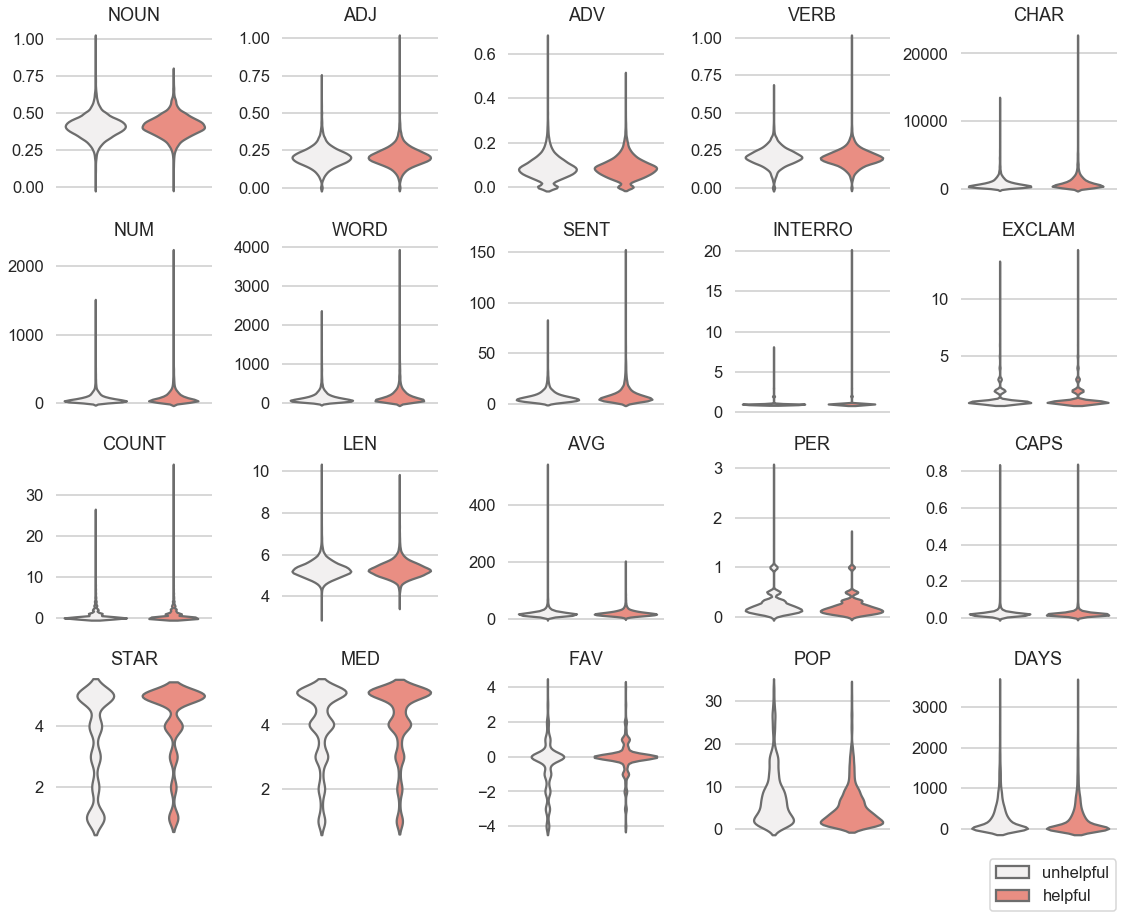

In [3]:
# plot feature distributions for helpful and unhelpful reviews
sns.set_style('whitegrid')
sns.set_context("talk")

fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(19,15), facecolor='w')
plt.subplots_adjust(wspace=.45, hspace=.25)
sns.despine(bottom = True, left = True)


r = c = 0
for col in cols[3:]:
    sns.violinplot(data=df, y=df[col], x=df.TARGET,
                   ax=ax[r][c], legend_out = True,
                   inner=None, palette='light:salmon').set_title(col)
    
# ax[r][c].set_ylim(ymin=None, ymax=df[col].quantile(.995))
    ax[r][c].set_xticks([])
    ax[r][c].set_xlabel('')
    ax[r][c].set_ylabel('')

    if c != 4:
        c += 1
    else:
        r += 1
        c = 0

# sns.violinplot(data=df, y=df.DAYS, x=df.TARGET, ax=ax[3][4], inner=None, palette='light:salmon')

# ax[3][4].set_xticks([])
# ax[3][4].set_xlabel('')
# ax[3][4].set_ylabel('')
# ax[3][4].set_title('DAYS')
ax[3][4].legend(labels=['unhelpful','helpful'], bbox_to_anchor=(1.05, -0.05))

plt.savefig(fname='images/density', bbox_inches='tight', pad_inches=0.1)
plt.show()


### Examine correlations

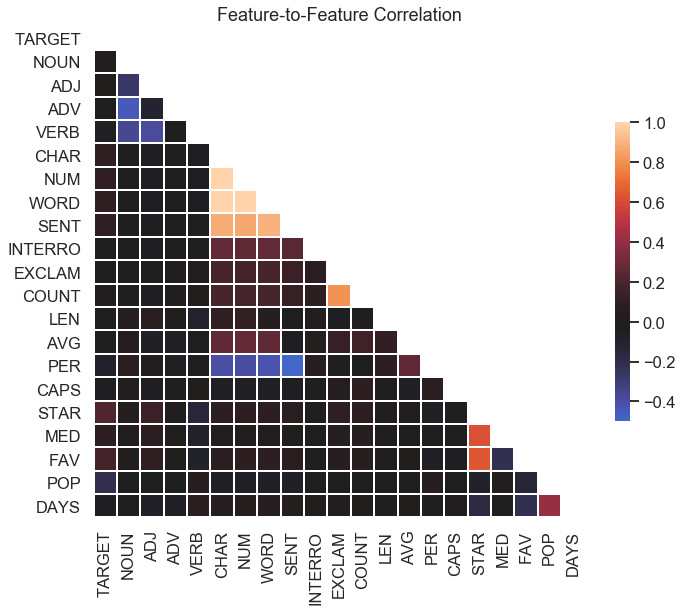

In [4]:
# examine pairwise correlations
sns.set_style('white')
sns.set_palette('dark:salmon')
sns.set_context("talk")

plt.figure(figsize=(11,11), facecolor='w')

sns.heatmap(
    df.corr(),
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)),
    vmin=-0.5, vmax=1, center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.5}).set_title('Feature-to-Feature Correlation')

plt.savefig(fname='images/corr_mtrx', bbox_inches='tight', pad_inches=0.1)
plt.show()

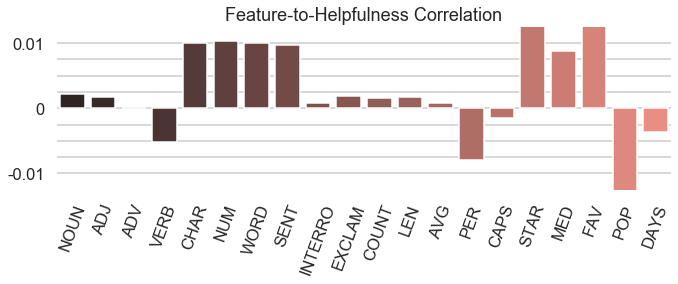

In [5]:
# examine target correlations
sns.set_style('whitegrid')
sns.set_context("talk")

x = df[cols[1:]].corrwith(df.TARGET).index
y = df[cols[1:]].corrwith(df.TARGET).values

plt.figure(figsize=(11,3), facecolor='w')
plt.xticks(rotation=70)
plt.ylim(bottom=-.125, top=.125)
plt.yticks([-0.1,-0.075,-0.05,-0.025,0,0.025,0.05,0.075,0.1],
           [-0.01,'','','',0,'','','',0.01])

sns.despine(bottom=True, left=True)
sns.barplot(x=x, y=y, palette='dark:salmon').set_title('Feature-to-Helpfulness Correlation')

plt.savefig(fname='images/corr_trgt', bbox_inches='tight', pad_inches=0.1)
plt.show()


### Examine token frequenies

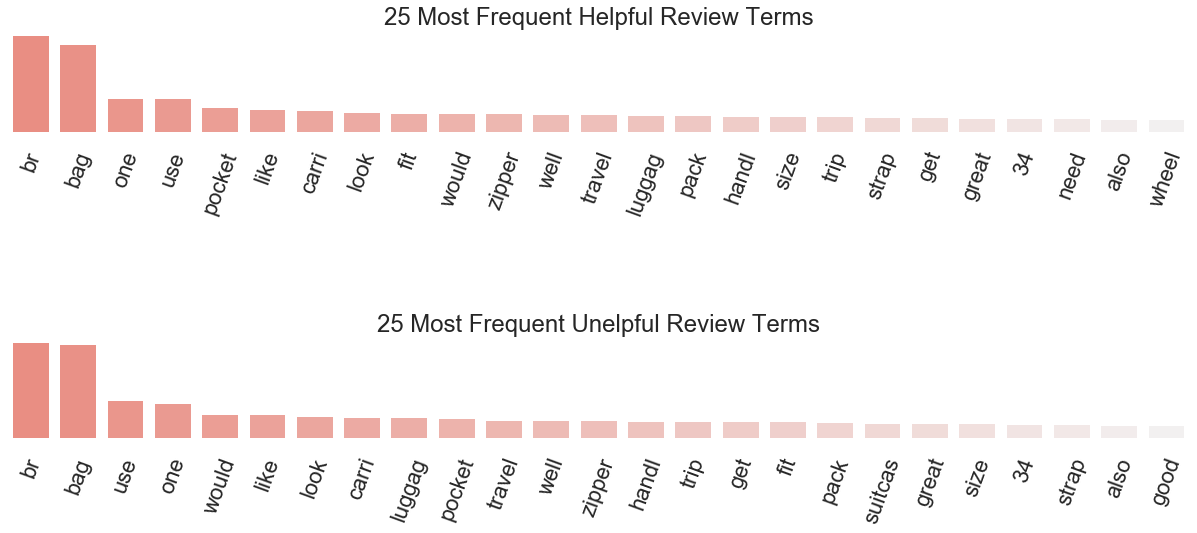

In [6]:
# helpful/unhelpful review token vocabularies
helpful_review_vocab = [word for review in df[df.TARGET==1].STEM for word in eval(review)]
helpful_review_vocab_freqdist = FreqDist(helpful_review_vocab)

unhelpful_review_vocab = [word for review in df[df.TARGET==0].STEM for word in eval(review)]
unhelpful_review_vocab_freqdist = FreqDist(unhelpful_review_vocab)

# helpful/unhelpful reviews' 25 most frequent tokens
sns.set_context("poster")
sns.set_style('white')

x1 = [k for k, v in sorted(helpful_review_vocab_freqdist.items(), key=lambda x: -x[1])][:25]
y1 = [v for k, v in sorted(helpful_review_vocab_freqdist.items(), key=lambda x: -x[1])][:25]
x2 = [k for k, v in sorted(unhelpful_review_vocab_freqdist.items(), key=lambda x: -x[1])][:25]
y2 = [v for k, v in sorted(unhelpful_review_vocab_freqdist.items(), key=lambda x: -x[1])][:25]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18,7), facecolor='w')
fig.tight_layout()

plt.subplots_adjust(hspace=2)
plt.Axes.set_facecolor(ax[0], color='white')
plt.Axes.set_facecolor(ax[1], color='white')

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=70)
ax[0].set_yticks([])
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=70)
ax[1].set_yticks([])

sns.despine(bottom = True, left = True)
sns.barplot(x=x1, y=y1, ax=ax[0], palette='light:salmon_r').set_title('25 Most Frequent Helpful Review Terms')
sns.barplot(x=x2, y=y2, ax=ax[1], palette='light:salmon_r').set_title('25 Most Frequent Unelpful Review Terms')
plt.savefig(fname='images/helpful_freqdist', bbox_inches='tight', pad_inches=.1)
plt.show()

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Explained variation per principal component: [8.49672370e-01 1.49928666e-01 1.80515063e-04]


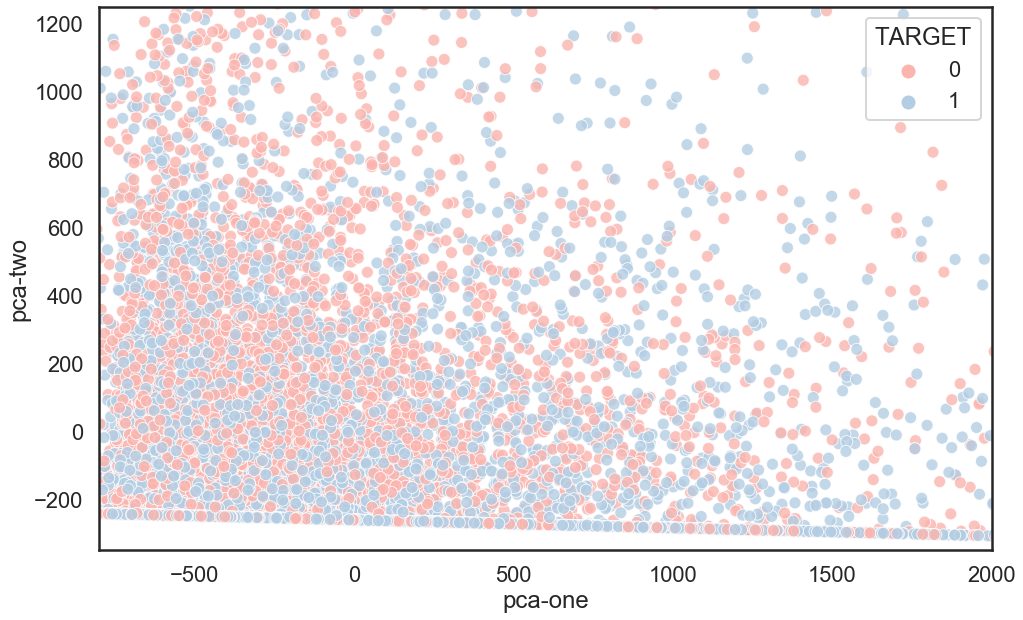

In [68]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[cols[3:]])
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# Explained variation per principal component: [0.09746116 0.07155445 0.06149531]
    
plt.figure(figsize=(16,10))
plt.xlim(left=-800, right=2000)
plt.ylim(bottom=-350, top=1250)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="TARGET",
    palette=sns.color_palette('Pastel1', 2),
    data=df,
    legend="full",
    alpha=0.8
    
)

In [9]:
from mpl_toolkits.mplot3d import Axes3D

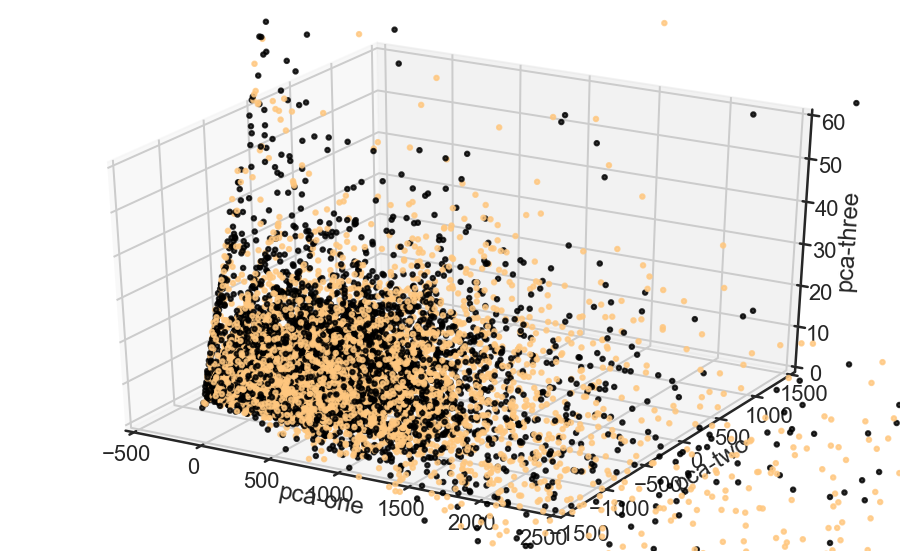

In [85]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    c=df["TARGET"],
    alpha=0.8,
    cmap='copper'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.set_xlim(left=-500, right=2500)
ax.set_ylim(bottom=-1500, top=1500)
ax.set_zlim(0, 60)
plt.show()

In [32]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df[cols[3:]])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12132 samples in 0.025s...
[t-SNE] Computed neighbors for 12132 samples in 0.550s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12132
[t-SNE] Computed conditional probabilities for sample 2000 / 12132
[t-SNE] Computed conditional probabilities for sample 3000 / 12132
[t-SNE] Computed conditional probabilities for sample 4000 / 12132
[t-SNE] Computed conditional probabilities for sample 5000 / 12132
[t-SNE] Computed conditional probabilities for sample 6000 / 12132
[t-SNE] Computed conditional probabilities for sample 7000 / 12132
[t-SNE] Computed conditional probabilities for sample 8000 / 12132
[t-SNE] Computed conditional probabilities for sample 9000 / 12132
[t-SNE] Computed conditional probabilities for sample 10000 / 12132
[t-SNE] Computed conditional probabilities for sample 11000 / 12132
[t-SNE] Computed conditional probabilities for sample 12000 / 12132
[t-SNE] Computed conditional probabilities for sa

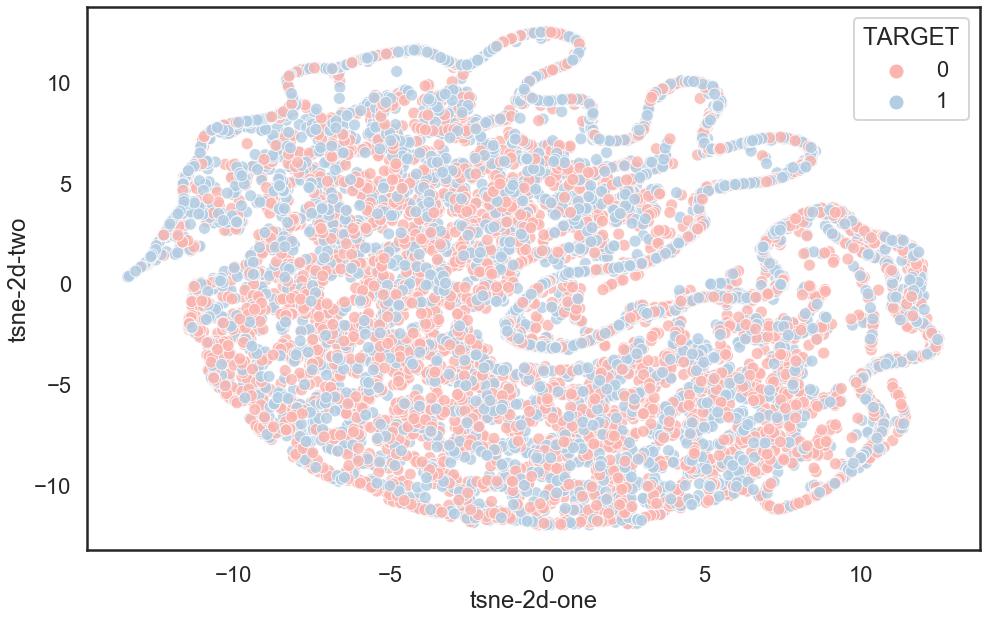

In [83]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="TARGET",
    palette=sns.color_palette("Pastel1", 2),
    data=df,
    legend="full",
    alpha=0.8
)